In [1]:
from disease_model import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
import plotly.express as px
import csv

from itertools import cycle
import random
import math
import scipy.stats as ss

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [2]:
# model = DiseaseModel(10)
# for i in range (10):
#     model.step()

# disease_spread = [a.state for a in model.schedule.agents]

# plt.hist(disease_spread)

# disease_total = []
# for j in range(100):
#     model = DiseaseModel(10)
#     for i in range(10):
#         model.step()

#     for agent in model.schedule.agents:
#         disease_total.append(agent.state)

# plt.hist(disease_total, bins=range(max(disease_total)+1))

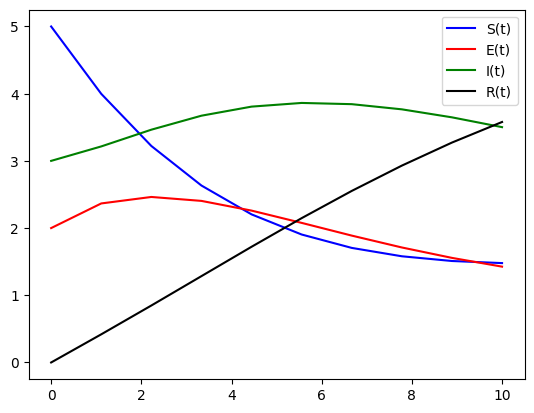

In [3]:
N = 10
# Parameter values
t_incubation = 3
t_infective = 8



# Initial number of infected and recovered individuals
e_initial = 2
i_initial = 3
r_initial = 0
s_initial = N - e_initial - i_initial - r_initial

epsilon = 1/t_incubation
gamma = 1/t_infective
alpha = 0.0005
beta = 0.85
mu = 0.05

# SEIR model differential equations.
def deriv(x, t, mu, alpha, beta, gamma, epsilon ):
    s, e, i, r = x
    dsdt = mu*N - mu * s - beta * s * (i/N)
    dedt =  beta * s * (i/N) - (mu + epsilon)* e
    didt = epsilon * e - (gamma + mu + alpha) * i
    drdt =  gamma * i - mu * r
    return [dsdt, dedt, didt, drdt]

t = np.linspace(0, 10, 10)
x_initial = s_initial, e_initial, i_initial, r_initial
soln = odeint(deriv, x_initial, t, args=(mu, alpha, beta, gamma, epsilon))
s, e, i, r = soln.T
plt.plot(t,s, 'b')
plt.plot(t,e, 'r')
plt.plot(t,i, 'g')
plt.plot(t,r, 'k')
plt.legend(['S(t)', 'E(t)', 'I(t)', 'R(t)'])

new_S = []
new_E = []
new_I = []
new_R = []
for j in range(10):
    new_S.append(math.floor(s[j]))
    new_E.append(math.floor(e[j]))
    new_I.append(math.floor(i[j]))
    new_R.append(10-new_S[j]-new_E[j]-new_I[j])

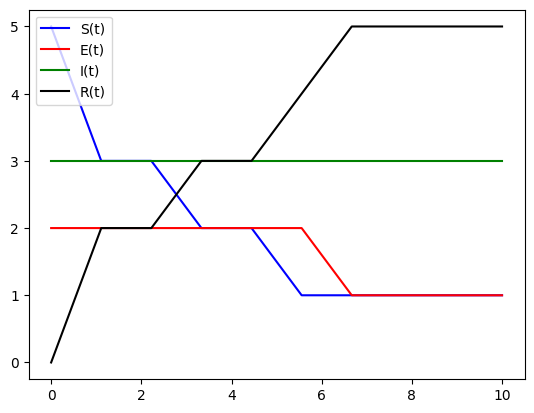

In [4]:
plt.plot(t,new_S, 'b')
plt.plot(t,new_E, 'r')
plt.plot(t,new_I, 'g')
plt.plot(t,new_R, 'k')
plt.legend(['S(t)', 'E(t)', 'I(t)', 'R(t)'])

## Further analysis

In [5]:
#Initiating with at t_0 : S and E (no Infected at t = 0 days)
# Case 1: Infection 0 in the region at t = 0
# Case 2: Infection not 0 in the region at t = 0
# Exposed turns Infected or Susceptible after a number of days



number_of_people = 800
width_of_grid = 30
height_of_grid = 30
number_of_iterations = 10

mu_2 = 0.2
mu_3 = 0.3
mu_1 = 1 - mu_2 - mu_3

delta_1 = 0.1
delta_2 = 0
delta_3 = 0
delta_4 = 0

beta_12 = 0.9/5
beta_13 = 0.4/5
beta_21 = 0.5/5
beta_23 = 0.4/5
beta_34 = 0.5/5

epsilon_12 = 2
epsilon_13 = 2 
epsilon_21 = 10
epsilon_23 = 3
epsilon_34 = 5

theta_12 = 0.9
theta_13 = 0.2
theta_21 = 0.3
theta_23 = 0.4
theta_34 = 0.5

sigma_12 = 0.06
sigma_13 = 0.07
sigma_21 = 0.08
sigma_23 = 0.09
sigma_34 = 0.1
    

model = DiseaseModel(number_of_people, width_of_grid, height_of_grid, width_of_grid - 1, height_of_grid - 1,  mu_1, mu_2, mu_3, delta_1, delta_2, delta_3, delta_4, beta_12, beta_13, beta_21, beta_23, beta_34, epsilon_12, epsilon_13, epsilon_21, epsilon_23, epsilon_34, theta_12, theta_13, theta_21, theta_23, theta_34, sigma_12, sigma_13, sigma_21, sigma_23, sigma_34)
for i in range(number_of_iterations):
    model.step()


In [ ]:
agent_counts = np.zeros((model.grid.width, model.grid.height))
for cell in model.grid.coord_iter():
    cell_content, x, y = cell
    
    agent_count = len(cell_content)
    agent_counts[x][y] = agent_count
plt.figure()
plt.imshow(agent_counts, interpolation='nearest', origin = 'lower')
# plt.imshow(agent_counts, interpolation='nearest')
plt.colorbar()  


the_agents = []
plt.figure()
index = 1
for i in range (3):
    for j in range(3):
        agent_counts_1 = np.zeros((int(model.grid.width/3), int(model.grid.height/3)))
    
        for i1 in range(30):
            for j1 in range(30):
                agent_counts_1[i1][j1] = agent_counts[i1+ 30*i][j1+ 30*j]
                plt.subplot(3, 3, index)
            plt.imshow(agent_counts_1, interpolation='nearest', origin = 'lower')
            plt.colorbar()
        the_agents.append(agent_counts_1)
        index+= 1                



the_agents = []
plt.figure()
index = 1
for i in range (3):
    for j in range(3):
        agent_counts_1 = np.zeros((int(model.grid.width/3), int(model.grid.height/3)))
    
        for i1 in range(10):
            for j1 in range(10):
                agent_counts_1[i1][j1] = agent_counts[i1+ 10*i][j1+ 10*j]
                plt.subplot(3, 3, index)
            plt.imshow(agent_counts_1, interpolation='nearest', origin = 'lower')
            plt.colorbar()
        the_agents.append(agent_counts_1)
        index+= 1                

In [ ]:
import itertools
agent_reporters = model.datacollector.get_model_vars_dataframe()
print(agent_reporters)

# state_S = agent_reporters["S"]
# state_S.plot(legend='S')

# state_E = agent_reporters["E"]
# state_E.plot(legend='E')

state_I = agent_reporters["I"]

#[ beta_12, beta_13, beta_21, beta_23, beta_34,   
state_I.plot(legend='I', title = "[ " +str(beta_12) + str(", ") +str(beta_13) + str(", ") 
             +str(beta_21) + str(", ") +str(beta_23) + str(", ") +str(beta_34) + str(", ") 
            +str(epsilon_12) + str(", ") +str(epsilon_13) + str(", ") +str(epsilon_21) + str(", ")
             +str(epsilon_23) + str(", ") +str(epsilon_34) + str(" ]")  )

# state_R = agent_reporters["R"]
# state_R.plot(legend='R')


# l = agent_reporters.values.tolist()
# plt.figure()
#merged = pd.DataFrame(list(itertools.chain.from_iterable(l)))
#merged.plot()


# model_reporters = model.datacollector.get_agent_vars_dataframe()
# print(model_reporters)

# # save the agent data to CSV
# agent_reporters.to_csv("agent_data.csv")

# # save the model data to CSV.
# model_reporters.to_csv("model_data.csv")


In [ ]:
%run disease_model_viz.py

In [ ]:
from mesa.batchrunner import BatchRunner

In [ ]:
fixed_params = {"width": 50,
               "height": 50}
variable_params = {"N": range(10, 510, 10)}

batch_run = BatchRunner(DiseaseModel,
                        variable_params,
                        fixed_params,
                        iterations=5,
                        max_steps=100,
                        model_reporters={"Current State": infection_rates})
batch_run.run_all()

In [ ]:
run_data = batch_run.get_model_vars_dataframe()
populations = run_data["Current State"].values.tolist()
merged_pop = pd.DataFrame(populations)
merged_pop.plot()
merged_pop.head
plt.scatter(run_data.N, run_data.Gini)

In [ ]:
import os
working_directory = os.getcwd()
print(working_directory)

In [ ]:
path = working_directory+'/agent_data.csv'
df = pd.read_csv(path)

In [ ]:
df.head()

In [ ]:
print(df)

In [ ]:
display(df.iloc[2])

In [ ]:
df.shape

In [ ]:
the_new_dictionary = pd.read_csv('agent_data.csv', header=None, index_col=0).to_dict()

In [ ]:
columns = []
for column in df:
    columns.append(column)
print(columns)

In [ ]:
print(columns[0])

In [ ]:
df['Current State'].describe()

In [ ]:
import csv
the_rows_in_agent = []
# Open file 
with open('agent_data.csv') as file_obj:
      
    # Create reader object by passing the file 
    # object to reader method
    reader_obj = csv.reader(file_obj)
      
    # Iterate over each row in the csv 
    # file using reader object
    for row in reader_obj:
        the_rows_in_agent.append(row)

In [ ]:
path = working_directory+'/model_data.csv'
df_1 = pd.read_csv(path)

In [ ]:
display(df_1.iloc[2])

In [ ]:
df_1.shape

In [ ]:
df_1.head()

In [ ]:
columns = []
for column in df_1:
    columns.append(column)
print(columns)

In [ ]:
import csv
  
# Open file 
the_rows_in_model = []
with open('model_data.csv') as file_obj:
      
    # Create reader object by passing the file 
    # object to reader method
    reader_obj = csv.reader(file_obj)
      
    # Iterate over each row in the csv 
    # file using reader object
    
    for row in reader_obj:
        the_rows_in_model.append(row)